### **Imports Made**:
- Numpy for general purpose tasks (ex: file loads, matrix operations and arrangements, etc)
- TensorFlow for the entire CNN structure and implementation, as well as a multitude of additional general purpose functions regarding machine learning
- sklearn.model_selection for the train test split function that allows our data split
- sklearn.linear_metrics for more precise accuracy indicators, and confusion matrix representation
- imlearn.over_sampling for the SMOTE data augmentation function

The key metric to be evaluated will be Balanced Accuracy, just as stated in the project report, but f1 also provides useful insight.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score
from imblearn.over_sampling import SMOTE

2023-10-20 12:20:09.752934: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-20 12:20:09.985343: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-20 12:20:09.987617: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-20 12:20:11.718294: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### **Data Extraction**:

Input files are loaded into variables *x*, *y* and *x_project*, this last one being from the *x_test* file. Commented below is a subset of code that performs outlier removal of two points who in a previous analysis were thought to be harmful for our model. But later these points did appear to have a degree of importance, especially due to them being similar to a couple of points in the testing samples. What is not commented, is the removal of four features from x_train and x_test, these same features from analysis through lasso revealed to be a little bit harmful to the SSE of our model. Thus, removing said dimensions improves our accuracy while still keeping our model structured and secure.

There is a 85.8684789126524 proportion between classes
There is a 14.131521087347593 proportion between classes


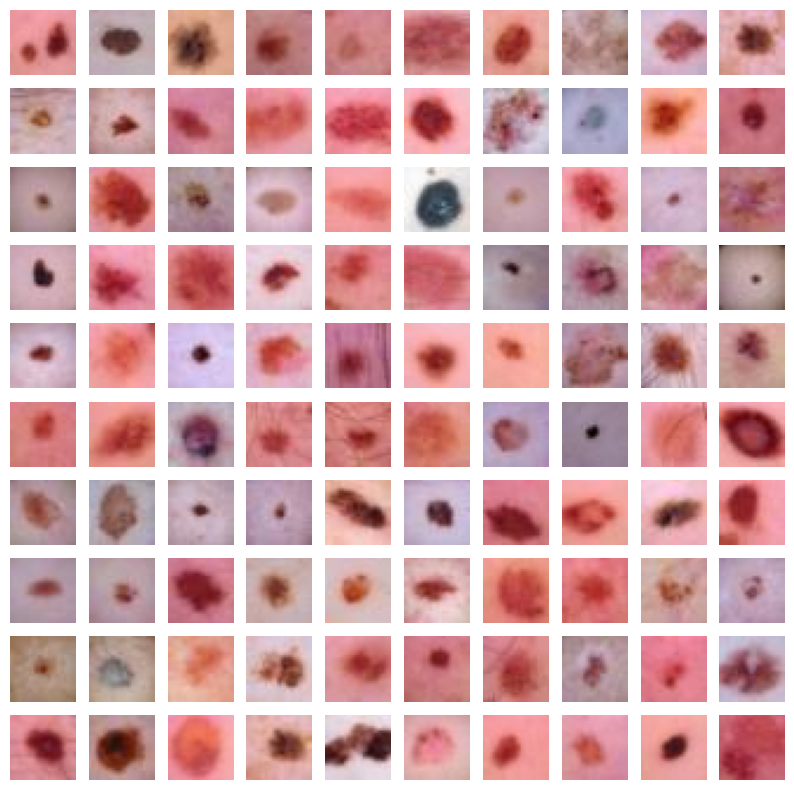

In [2]:

augmented_class2 = []

# Load data
x = np.load("Xtrain_Classification1.npy")
y = np.load("ytrain_Classification1.npy")
x_test = np.load("Xtest_Classification1.npy")

# 255 is the biggest number any value of x can take

# x = np.reshape(x,(len(x),28,28,3))

x = (x).astype('float32')/255.0

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)

y_val_tl = tf.keras.utils.to_categorical(y_val)

class1 = X_train[y_train == 0]
class2 = X_train[y_train == 1]

n_class1 = len([0 for i in range(y_train.shape[0]) if y_train[i] == 0])
n_class2 = len([0 for i in range(y_train.shape[0]) if y_train[i] == 1])

print(f'There is a {(n_class1/(n_class1 + n_class2)) * 100} proportion between classes')
print(f'There is a {(n_class2/(n_class1 + n_class2)) * 100} proportion between classes')

smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

y_train_tl = tf.keras.utils.to_categorical(y_train_balanced)

X_train_balanced = np.reshape(X_train_balanced,(len(X_train_balanced),28,28,3))
X_val = np.reshape(X_val,(len(X_val),28,28,3))


plt.figure(figsize=(10, 10))
for i in range(100):
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(X_train_balanced[i])
    plt.axis("off")

'''
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.5),
])

for i in range(n_class1 - n_class2):
    random_index = np.random.randint(0, n_class2)
    augmented_image = data_augmentation(tf.expand_dims(class2[random_index], 0))
    augmented_class2.append(augmented_image)

augmented_class2 = np.vstack(augmented_class2)

X_train_balanced = np.vstack([X_train, augmented_class2])
y_train_balanced = np.concatenate([y_train, np.ones(n_class1 - n_class2)])

'''

y_train_balanced = tf.keras.utils.to_categorical(y_train_balanced,2)
y_val = tf.keras.utils.to_categorical(y_val,2)




Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 conv2d_39 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 conv2d_40 (Conv2D)          (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 11, 11, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_36 (Dropout)        (None, 11, 11, 32)        0         
                                                                 
 conv2d_41 (Conv2D)          (None, 9, 9, 64)          18496     
                                                      

c:\Users\Utilizador\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\backend.py:5820: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


9/9 [==============================] - 9s 779ms/step - loss: 0.7709 - accuracy: 0.5664 - val_loss: 0.6893 - val_accuracy: 0.7130
Epoch 2/100
9/9 [==============================] - 7s 754ms/step - loss: 0.6050 - accuracy: 0.6881 - val_loss: 0.6785 - val_accuracy: 0.8633
Epoch 3/100
9/9 [==============================] - 7s 755ms/step - loss: 0.5294 - accuracy: 0.7438 - val_loss: 0.6550 - val_accuracy: 0.8633
Epoch 4/100
9/9 [==============================] - 7s 729ms/step - loss: 0.4986 - accuracy: 0.7708 - val_loss: 0.6209 - val_accuracy: 0.8633
Epoch 5/100
9/9 [==============================] - 7s 760ms/step - loss: 0.4934 - accuracy: 0.7676 - val_loss: 0.6074 - val_accuracy: 0.8633
Epoch 6/100
9/9 [==============================] - 7s 746ms/step - loss: 0.4715 - accuracy: 0.7853 - val_loss: 0.5902 - val_accuracy: 0.8633
Epoch 7/100
9/9 [==============================] - 7s 744ms/step - loss: 0.4672 - accuracy: 0.7853 - val_loss: 0.5664 - val_accuracy: 0.8633
Epoch 8/100
9/9 [========

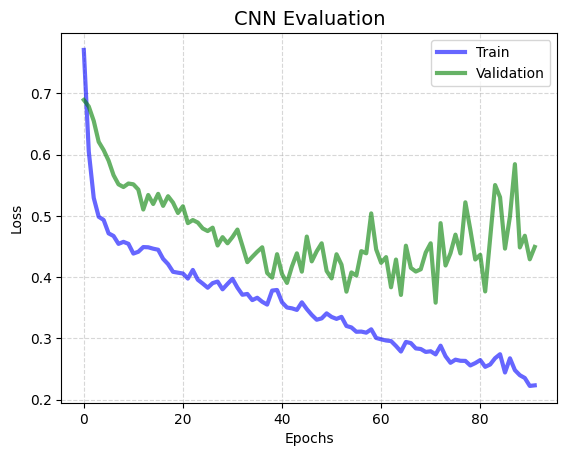

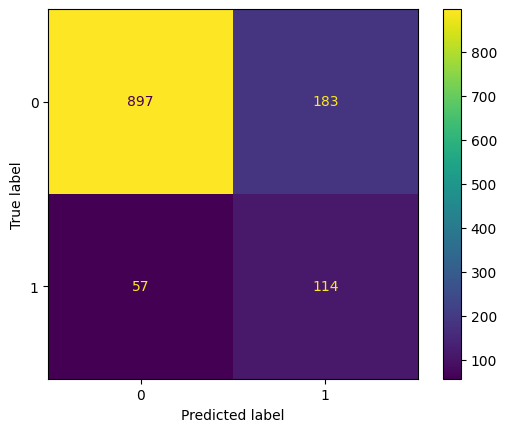

In [47]:
batch_size = 1000
lr = 0.001
epochs = 100



model_MLP = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(2, activation='softmax')
])

'''
model_MLP = tf.keras.models.Sequential([
    tf.keras.layers.RandomRotation(factor = 0.2),
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(608, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(608, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(608, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(2, activation='softmax')
])
'''

model_MLP.summary()

adam = tf.keras.optimizers.Adam(learning_rate = lr)
model_MLP.compile(optimizer = adam,
              loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics = ['accuracy'])

early_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 20, verbose = 1, restore_best_weights = True)

history = model_MLP.fit(x = X_train_balanced, y = y_train_balanced, epochs = epochs, batch_size = batch_size, validation_data = (X_val,y_val), callbacks = [early_callback])

y_pred = model_MLP.predict(X_val)
y_pred = np.argmax(y_pred, axis = 1)
model_MLP.evaluate(X_val, y_val)
y_true = np.argmax(y_val, axis = 1)
print(f'Balanced Accuracy score is {balanced_accuracy_score(y_true, y_pred)}')


####PLOT EVOLUTION
plt.figure(1)
plt.clf()
plt.plot(history.history['loss'], label = 'train', color = "blue", linewidth = 3, alpha = 0.6)
plt.plot(history.history['val_loss'], label = 'validation', color = "green", linewidth = 3, alpha = 0.6)
plt.xlabel(r"Epochs")
plt.ylabel(r"Loss")
plt.title(r"CNN Evaluation", fontsize = 14)
plt.legend(labels=[r'Train', r'Validation'])
plt.grid(linestyle = '--', alpha = 0.5)
plt.show()

cm = confusion_matrix(y_true, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
    

### **Transfer Learning**:

In [141]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
X_train_tl = tf.image.resize(X_train_balanced, (96,96))

base_model = tf.keras.applications.MobileNetV2(input_shape=(96,96,3),
                                               include_top=False,
                                               weights='imagenet')

In [150]:
base_model.trainable = False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(2, activation='softmax')

In [151]:

inputs = tf.keras.Input(shape=(96, 96, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 96, 96, 3)]       0         
                                                                 
 tf.math.truediv_11 (TFOpLa  (None, 96, 96, 3)         0         
 mbda)                                                           
                                                                 
 tf.math.subtract_11 (TFOpL  (None, 96, 96, 3)         0         
 ambda)                                                          
                                                                 
 mobilenetv2_1.00_96 (Funct  (None, 3, 3, 1280)        2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
 2 (GlobalAveragePooling2D)                               

In [157]:

model.compile(optimizer = 'adam',
              loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [162]:
initial_epochs = 100
X_val_tl = tf.image.resize(X_val, (96,96))
loss0, accuracy0 = model.evaluate(X_val_tl,y_val_tl)

40/40 [==============================] - 4s 88ms/step - loss: 0.6993 - accuracy: 0.2990


In [166]:
early_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 20, verbose = 1, restore_best_weights = True)
history = model.fit(x = X_train_tl, y = y_train_balanced, epochs = initial_epochs, validation_data = (X_val_tl,y_val), callbacks = [early_callback])

Epoch 1/100
267/267 [==============================] - 29s 108ms/step - loss: 0.6982 - accuracy: 0.5097 - val_loss: 0.8015 - val_accuracy: 0.1279
Epoch 2/100
267/267 [==============================] - 27s 102ms/step - loss: 0.7012 - accuracy: 0.5098 - val_loss: 0.6914 - val_accuracy: 0.5284
Epoch 3/100
267/267 [==============================] - 27s 101ms/step - loss: 0.6976 - accuracy: 0.5086 - val_loss: 0.8482 - val_accuracy: 0.1279
Epoch 4/100
267/267 [==============================] - 26s 98ms/step - loss: 0.7022 - accuracy: 0.5080 - val_loss: 0.6956 - val_accuracy: 0.4277
Epoch 5/100
267/267 [==============================] - 26s 98ms/step - loss: 0.6972 - accuracy: 0.5050 - val_loss: 0.6084 - val_accuracy: 0.8721
Epoch 6/100
267/267 [==============================] - 27s 102ms/step - loss: 0.6950 - accuracy: 0.5166 - val_loss: 0.7877 - val_accuracy: 0.1279
Epoch 7/100
267/267 [==============================] - 30s 111ms/step - loss: 0.6991 - accuracy: 0.5109 - val_loss: 0.6281 - v

40/40 [==============================] - 4s 94ms/step - loss: 0.5218 - accuracy: 0.8721
F1 score is 0.0
Balanced Accuracy score is 0.5


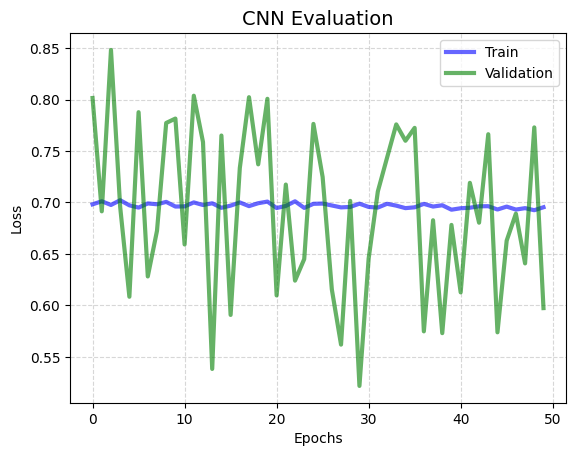

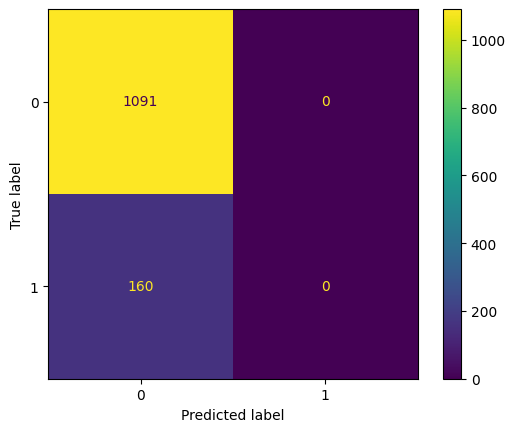

In [167]:
y_pred_tl = model.predict(X_val_tl)
y_pred_tl = np.argmax(y_pred_tl, axis = 1)
model.evaluate(X_val_tl, y_val)
y_true_tl = np.argmax(y_val, axis = 1)
print(f'Balanced Accuracy score is {balanced_accuracy_score(y_true_tl, y_pred_tl)}')


####PLOT EVOLUTION
plt.figure(1)
plt.clf()
plt.plot(history.history['loss'], label = 'train', color = "blue", linewidth = 3, alpha = 0.6)
plt.plot(history.history['val_loss'], label = 'validation', color = "green", linewidth = 3, alpha = 0.6)
plt.xlabel(r"Epochs")
plt.ylabel(r"Loss")
plt.title(r"CNN Evaluation", fontsize = 14)
plt.legend(labels=[r'Train', r'Validation'])
plt.grid(linestyle = '--', alpha = 0.5)
plt.show()

cm = confusion_matrix(y_true_tl, y_pred_tl)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [11]:
from keras_tuner import Hyperband
import keras_tuner as kt

def cnn_tuning(hp):
    # Initialize network
    model = tf.keras.models.Sequential()

    choice_act_func = hp.Choice("activation_function", ["relu", "tanh"])

    model.add(tf.keras.layers.RandomFlip("horizontal_and_vertical"))
    model.add(
        tf.keras.layers.RandomRotation(
            factor=hp.Float("rotat", min_value=0.2, max_value=0.5, step=0.3)
        )
    )

    model.add(
        tf.keras.layers.Conv2D(
            filters=hp.Int("filters_1", min_value=16, max_value=32, step=16),
            kernel_size=3,
            activation=choice_act_func,
            input_shape=(28, 28, 3),
        )
    )
    model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

    model.add(
        tf.keras.layers.Conv2D(
            filters=hp.Int("filters_1", min_value=16, max_value=32, step=16),
            kernel_size=3,
            activation=choice_act_func,
        )
    )
    model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

    model.add(tf.keras.layers.Flatten())

    model.add(
        tf.keras.layers.Dense(
            units=hp.Int("units", min_value=608, max_value=964, step=119),
            activation=choice_act_func,
        )
    )
    model.add(
        tf.keras.layers.Dropout(
            hp.Float("prob", min_value=0.3, max_value=0.5, step=0.2)
        )
    )

    model.add(
        tf.keras.layers.Dense(
            units=hp.Int("units", min_value=128, max_value=256, step=128),
            activation=choice_act_func,
        )
    )
    model.add(
        tf.keras.layers.Dropout(
            hp.Float("prob", min_value=0.3, max_value=0.5, step=0.2)
        )
    )

    model.add(
        tf.keras.layers.Dense(
            units=hp.Int("units", min_value=112, max_value=112, step=128),
            activation=choice_act_func,
        )
    )
    model.add(
        tf.keras.layers.Dropout(
            hp.Float("prob", min_value=0.3, max_value=0.5, step=0.2)
        )
    )

    model.add(tf.keras.layers.Dense(units=2, activation="softmax"))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[0.001])),
        loss="binary_crossentropy",
        metrics=['accuracy'],
    )

    return model

tuner = Hyperband(
        cnn_tuning,
        objective=kt.Objective("val_loss", direction="min"),
        executions_per_trial=2,
        overwrite=True,
        directory="Directory",
        project_name="Model_chosen",
    )

tuner.search_space_summary()
tuner.search(
    X_train_balanced,
    y_train_balanced,
    epochs=10,
    validation_data=(X_val, y_val),
        )
chosen_hyperparams = tuner.get_best_hyperparameters(num_trials=1)

Trial 1 Complete [00h 00m 39s]
val_loss: 0.49152569472789764

Best val_loss So Far: 0.49152569472789764
Total elapsed time: 00h 00m 39s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
tanh              |relu              |activation_function
0.2               |0.5               |rotat
32                |32                |filters_1
846               |608               |units
0.3               |0.5               |prob
0.001             |0.001             |learning_rate
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
4                 |4                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
268/268 [==============================] - 14s 45ms/step - loss: 0.6029 - accuracy: 0.6912 - val_loss: 0.6033 - val_accuracy: 0.6299
Epoch 2/2
111/268 [===========>..................] - ETA: 6s - loss: 0.5251 - accuracy: 0.7269

KeyboardInterrupt: 

2023-10-20 12:20:32.793214: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2319840000 exceeds 10% of free system memory.


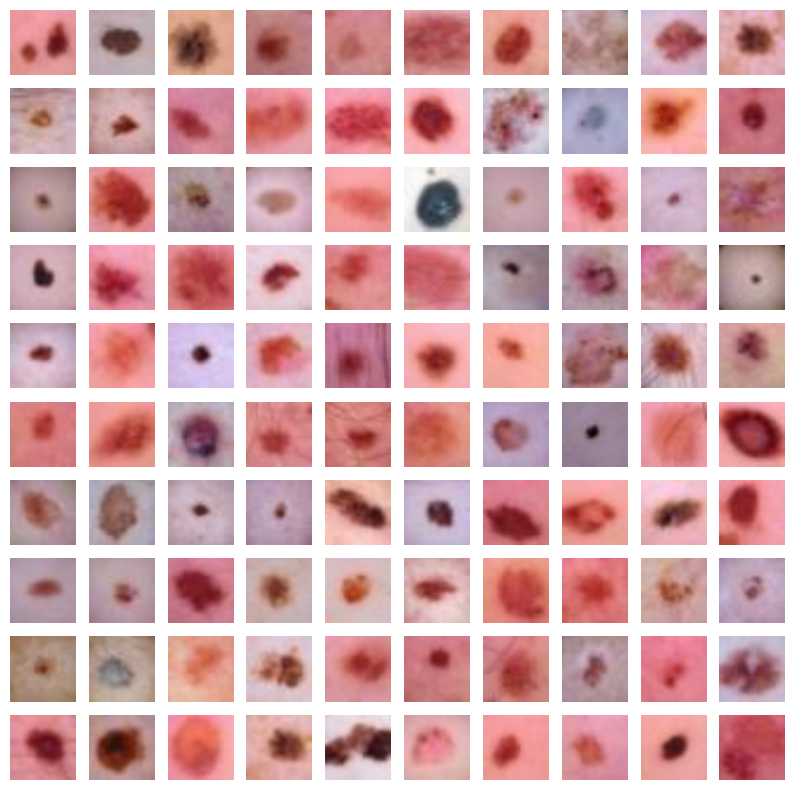

In [3]:
X_train_tl = tf.image.resize(X_train_balanced, (150,150))

plt.figure(figsize=(10, 10))
for i in range(100):
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(X_train_tl[i])
    plt.axis("off")


In [4]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

X_val_tl = tf.image.resize(X_val, (150,150))

base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = tf.keras.layers.Dense(2, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

adam = tf.keras.optimizers.Adam(learning_rate = 0.001)

model.compile(optimizer = adam, loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics = ['acc'])

inc_history = model.fit(x = X_train_tl, y = y_train_balanced, validation_data = (X_val_tl,y_val), epochs = 10)

2023-10-20 12:20:57.800586: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 337770000 exceeds 10% of free system memory.


Epoch 1/10


/home/user/.local/lib/python3.8/site-packages/keras/src/backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


: 